# Performance Analysis

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme()

## Time performance

In [114]:
performance_res_path = "./../results/performance.csv"
n_files = 5
performances = [pd.read_csv(performance_res_path[:-4] + str(i) + ".csv", index_col=0) for i in range(1, n_files + 1)]
performance = performances[0]

performance["mean_time"] = np.mean(np.array([performances[i].time for i in range(n_files)]), axis=0)
performance["std_time"] = np.std(np.array([performances[i].time for i in range(n_files)]), axis=0)
performance = performance.drop("time", axis=1)
performance["data_size"] = performance.data_size.values.astype(np.int32)

In [119]:
performance["time to log(log(n))"] = performance.mean_time / np.log(np.log(performance.data_size))
performance["time to log(n)"] = performance.mean_time / np.log(performance.data_size)
performance["time to sqrt(n)"] = performance.mean_time / np.sqrt(performance.data_size)
performance["time to n"] = performance.mean_time / performance.data_size
performance["time to n*log(n)"] = performance.mean_time /( np.log(performance.data_size) * performance.data_size)
performance["time to n^2"] = performance.mean_time / (performance.data_size* performance.data_size)
performance = performance.set_index("data_size")
performance

,mean_time,std_time,time to log(log(n)),time to log(n),time to sqrt(n),time to n,time to n*log(n),time to n^2
data_size,,,,,,,,
10,11.610883,0.270359,13.921381,5.042543,3.671684,1.161088,0.504254,0.116109
30,10.712960,0.598074,8.751506,3.149761,1.955910,0.357099,0.104992,0.011903
100,12.590621,0.338801,8.244362,2.734019,1.259062,0.125906,0.027340,0.001259
300,18.068180,0.636575,10.377275,3.167754,1.043167,0.060227,0.010559,0.000201
1000,37.344149,1.652255,19.322821,5.406119,1.180926,0.037344,0.005406,0.000037
3000,90.947181,3.642701,43.719621,11.359356,1.660461,0.030316,0.003786,0.000010


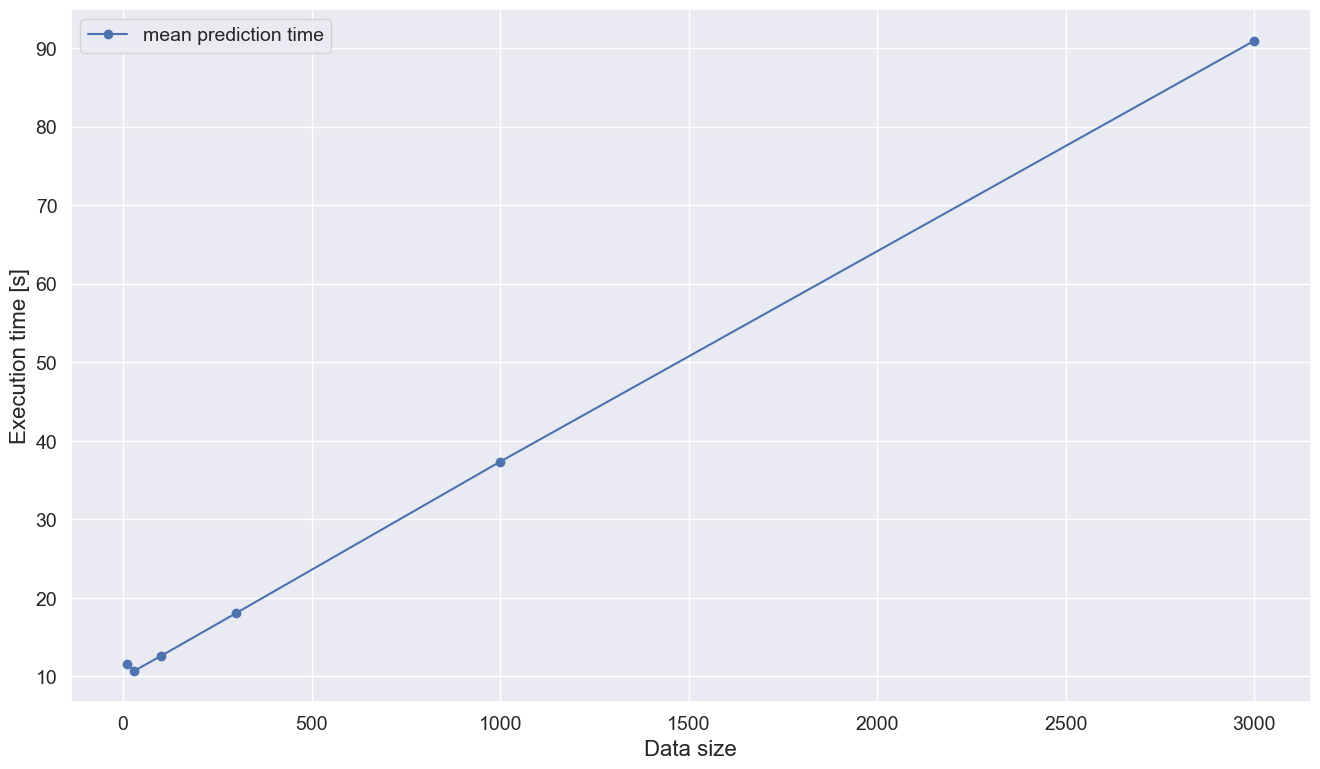

In [120]:
plt.figure(figsize=(16, 9))
plt.plot(performance.index.values, performance.mean_time, "-o", label="mean prediction time")
# plt.errorbar(performance.data_size,  performance.mean_time, yerr=performance.std_time, fmt="-o", label="mean prediction time")
plt.legend(fontsize=14)
plt.xlabel("Data size", fontsize=16)
plt.ylabel("Execution time [s]", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("./images/mean_prediction_time.jpg", dpi=200);

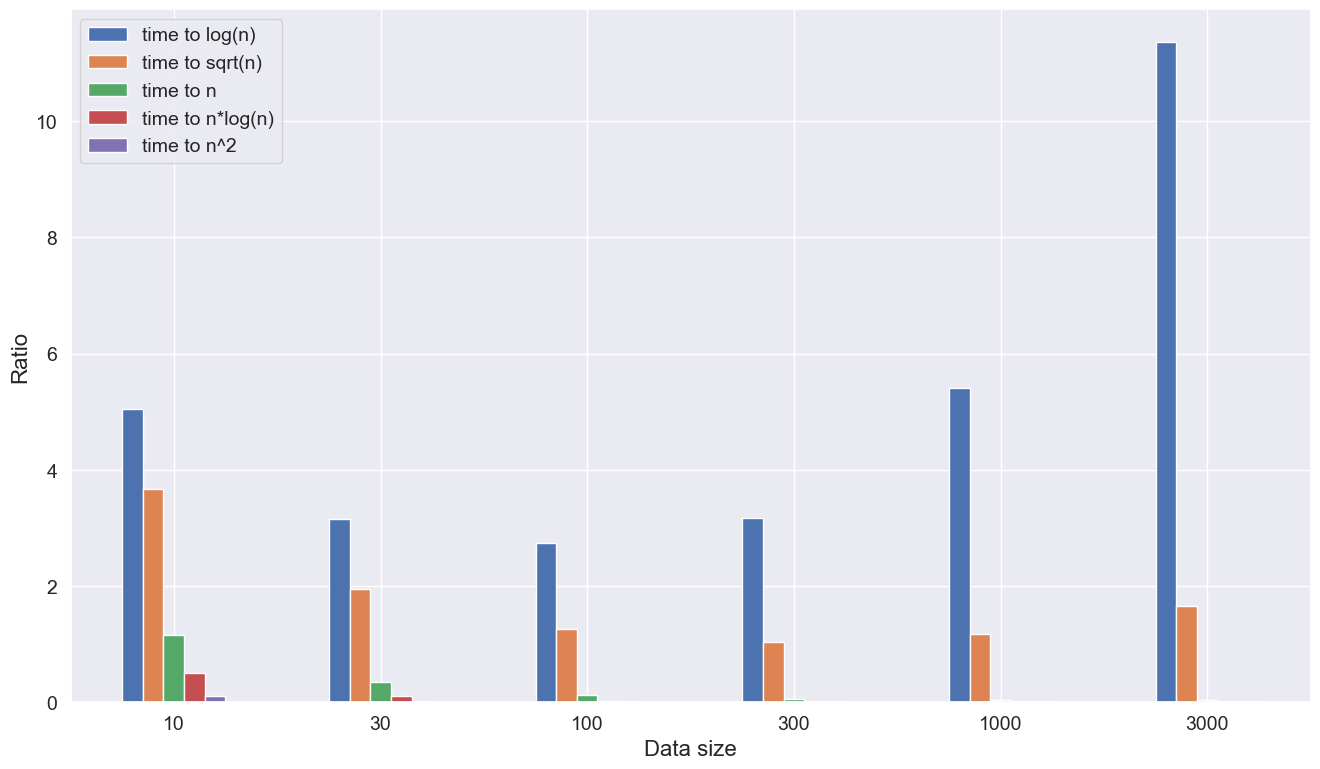

In [125]:
plt.figure(figsize=(16, 9))
performance.iloc[:, 3:].plot.bar(ax=plt.gca())
plt.legend(fontsize=14)
plt.xlabel("Data size", fontsize=16)
plt.ylabel("Ratio", fontsize=16)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.savefig("./images/time_complexities.jpg", dpi=200);

In [133]:
performance.to_csv("./../results/performance_ratios.csv", float_format="%.6f")

## Prediction performance

In [134]:
results_train ={'loss': 0.053648464381694794, 'accuracy': 0.9798133969306946, 'f1': 0.8592796325683594, 'precision': 0.8851756453514099, 'recall': 0.8444716930389404, 'auc': 0.9386639595031738, 'TP': 8264.0, 'TN': 117642.0, 'FP': 1072.0, 'FN': 1522.0}
results_test = {'loss': 0.08224591612815857, 'accuracy': 0.9701557755470276, 'f1': 0.8015211224555969, 'precision': 0.8381849527359009, 'recall': 0.7714735865592957, 'auc': 0.8812184929847717, 'TP': 1958.0, 'TN': 29184.0, 'FP': 378.0, 'FN': 580.0}


In [155]:
def save_res_to_csv(res_train, res_test, cols, path):
    res_train = pd.DataFrame.from_dict(res_train, orient="index")
    res_test = pd.DataFrame.from_dict(res_test, orient="index")
    res = pd.concat([res_train, res_test], axis=1)
    res.index.name= cols[0]
    res.columns = [cols[1:]]
    res = res.reset_index(drop=False)
    res.to_csv(path, float_format="%.6f")

In [156]:
save_res_to_csv(results_train, results_test, ["Metrics", "Scores Train", "Scores Test"], "./../results/best_model_metrics.csv")